<a href="https://colab.research.google.com/github/sadrasa97/football-goal-prediction/blob/main/subasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
suba=pd.read_csv('../content/train.csv')

In [ ]:
subatest=pd.read_csv('../content/test.csv')

In [ ]:
suba.head(45)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل
5,m_147,p_118,جریان بازی,سر,5.49,-1.50,1,0,کم,40,15,موقعیت از دست رفته
6,m_88,p_101,جریان بازی,سر,14.46,-1.25,3,0,متوسط,88,8,موقعیت از دست رفته
7,m_66,p_61,جریان بازی,سر,8.98,4.99,1,0,کم,10,29,موقعیت از دست رفته
8,m_132,p_84,جریان بازی,پای چپ,23.44,-1.25,3,0,متوسط,58,45,برخورد به دفاع
9,m_99,p_30,جریان بازی,پای چپ,8.48,3.99,2,1,متوسط,43,55,برخورد به دفاع


In [ ]:
suba= suba.drop('playerId', axis=1)

In [ ]:
suba= suba.drop('matchId', axis=1)

In [ ]:
Y=suba['outcome']

In [ ]:
#suba.playType= [1 if each == "جریان بازی" else 0 for each in suba.playType]

In [ ]:
Y= [1 if each == "گُل" or each=='گُل به خودی' else 0 for each in Y]

In [ ]:
suba=pd.get_dummies(suba)


In [ ]:
suba.head(40)

,x,y,interveningOpponents,interveningTeammates,minute,second,playType_جریان بازی,playType_ضربه آزاد مستقیم,playType_مستقیم از کرنر,playType_پنالتی,...,bodyPart_پای چپ,interferenceOnShooter_زیاد,interferenceOnShooter_متوسط,interferenceOnShooter_کم,outcome_برخورد به تیردروازه,outcome_برخورد به دفاع,outcome_مهار توسط دروازه بان,outcome_موقعیت از دست رفته,outcome_گُل,outcome_گُل به خودی
0,13.47,-11.22,1,0,70,9,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,9.48,14.22,3,0,55,4,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,29.43,-1.25,6,2,86,31,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,26.93,1.00,4,1,77,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,10.72,5.24,2,0,76,46,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,5.49,-1.50,1,0,40,15,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,14.46,-1.25,3,0,88,8,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,8.98,4.99,1,0,10,29,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,23.44,-1.25,3,0,58,45,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
9,8.48,3.99,2,1,43,55,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [ ]:
X=suba.iloc[:,0:17]

In [ ]:
X

,x,y,interveningOpponents,interveningTeammates,minute,second,playType_جریان بازی,playType_ضربه آزاد مستقیم,playType_مستقیم از کرنر,playType_پنالتی,bodyPart_سایر,bodyPart_سر,bodyPart_پای راست,bodyPart_پای چپ,interferenceOnShooter_زیاد,interferenceOnShooter_متوسط,interferenceOnShooter_کم
0,13.47,-11.22,1,0,70,9,1,0,0,0,0,0,1,0,0,1,0
1,9.48,14.22,3,0,55,4,1,0,0,0,0,0,0,1,0,1,0
2,29.43,-1.25,6,2,86,31,0,1,0,0,0,0,0,1,0,0,1
3,26.93,1.00,4,1,77,2,1,0,0,0,0,0,1,0,0,1,0
4,10.72,5.24,2,0,76,46,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,6.48,3.99,3,0,69,50,1,0,0,0,0,1,0,0,1,0,0
8921,21.45,-8.73,4,1,15,53,1,0,0,0,0,0,1,0,0,1,0
8922,11.97,3.24,3,0,84,34,1,0,0,0,0,0,0,1,0,1,0
8923,6.48,-6.98,1,0,4,39,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   x                            8925 non-null   float64
 1   y                            8925 non-null   float64
 2   interveningOpponents         8925 non-null   int64  
 3   interveningTeammates         8925 non-null   int64  
 4   minute                       8925 non-null   int64  
 5   second                       8925 non-null   int64  
 6   playType_جریان بازی          8925 non-null   uint8  
 7   playType_ضربه آزاد مستقیم    8925 non-null   uint8  
 8   playType_مستقیم از کرنر      8925 non-null   uint8  
 9   playType_پنالتی              8925 non-null   uint8  
 10  bodyPart_سایر                8925 non-null   uint8  
 11  bodyPart_سر                  8925 non-null   uint8  
 12  bodyPart_پای راست            8925 non-null   uint8  
 13  bodyPart_پای چپ   

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X= scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
method_names=[] 
method_scores=[]

Logistic Regression Classification Test Accuracy 0.8823529411764706


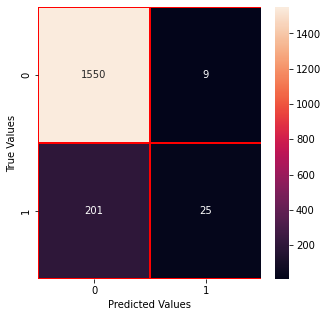

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.8823529411764706


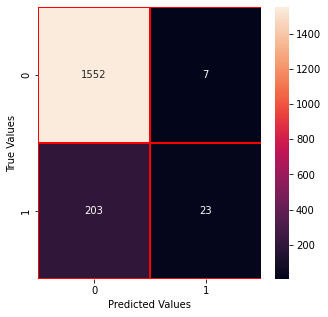

In [ ]:
# SVM!
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 5: 0.8745098039215686


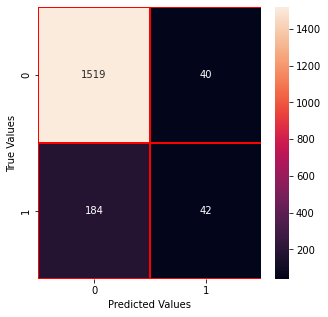

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 5: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import cross_val_score
#from keras.models import Sequential # initialize neural network library
#from keras.layers import Dense # build our layers library
#def build_classifier():
#    classifier = Sequential() # initialize neural network
#    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
 #   classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
#    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
 #   return classifier
#classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
#accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
#mean = accuracies.mean()
#variance = accuracies.std()
#print("Accuracy mean: "+ str(mean))
#print("Accuracy variance: "+ str(variance))

In [ ]:
subatest.head()

,minute,second,x,y,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter
0,76,7,6.98,-5.49,جریان بازی,سر,1,0,کم
1,81,18,27.43,1.00,جریان بازی,پای چپ,2,1,کم
2,86,50,13.47,-1.00,جریان بازی,پای چپ,4,0,متوسط
3,69,39,9.23,-9.23,جریان بازی,پای راست,1,0,زیاد
4,53,15,10.72,-8.48,جریان بازی,پای راست,2,1,کم


In [ ]:
subatest=pd.get_dummies(subatest)

In [ ]:
subatest.head()

,minute,second,x,y,interveningOpponents,interveningTeammates,playType_جریان بازی,playType_ضربه آزاد مستقیم,playType_مستقیم از کرنر,playType_پنالتی,bodyPart_سایر,bodyPart_سر,bodyPart_پای راست,bodyPart_پای چپ,interferenceOnShooter_زیاد,interferenceOnShooter_متوسط,interferenceOnShooter_کم
0,76,7,6.98,-5.49,1,0,1,0,0,0,0,1,0,0,0,0,1
1,81,18,27.43,1.00,2,1,1,0,0,0,0,0,0,1,0,0,1
2,86,50,13.47,-1.00,4,0,1,0,0,0,0,0,0,1,0,1,0
3,69,39,9.23,-9.23,1,0,1,0,0,0,0,0,1,0,1,0,0
4,53,15,10.72,-8.48,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
subatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   minute                       2000 non-null   int64  
 1   second                       2000 non-null   int64  
 2   x                            2000 non-null   float64
 3   y                            2000 non-null   float64
 4   interveningOpponents         2000 non-null   int64  
 5   interveningTeammates         2000 non-null   int64  
 6   playType_جریان بازی          2000 non-null   uint8  
 7   playType_ضربه آزاد مستقیم    2000 non-null   uint8  
 8   playType_مستقیم از کرنر      2000 non-null   uint8  
 9   playType_پنالتی              2000 non-null   uint8  
 10  bodyPart_سایر                2000 non-null   uint8  
 11  bodyPart_سر                  2000 non-null   uint8  
 12  bodyPart_پای راست            2000 non-null   uint8  
 13  bodyPart_پای چپ   

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
subatest= scaler.fit_transform(subatest)

In [ ]:
subatest

array([[0.79166667, 0.11864407, 0.10925325, ..., 0.        , 0.        ,
        1.        ],
       [0.84375   , 0.30508475, 0.44123377, ..., 0.        , 0.        ,
        1.        ],
       [0.89583333, 0.84745763, 0.21461039, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.08333333, 0.55932203, 0.18214286, ..., 0.        , 1.        ,
        0.        ],
       [0.55208333, 0.71186441, 0.29545455, ..., 0.        , 1.        ,
        0.        ],
       [0.32291667, 0.11864407, 0.36428571, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
y_pred_test = svm.predict(subatest)

In [ ]:
y_pred_test[0:250]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
subatest

array([[0.79166667, 0.11864407, 0.10925325, ..., 0.        , 0.        ,
        1.        ],
       [0.84375   , 0.30508475, 0.44123377, ..., 0.        , 0.        ,
        1.        ],
       [0.89583333, 0.84745763, 0.21461039, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.08333333, 0.55932203, 0.18214286, ..., 0.        , 1.        ,
        0.        ],
       [0.55208333, 0.71186441, 0.29545455, ..., 0.        , 1.        ,
        0.        ],
       [0.32291667, 0.11864407, 0.36428571, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
sss=pd.read_csv('/content/test.csv')

In [ ]:
sss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   minute                 2000 non-null   int64  
 1   second                 2000 non-null   int64  
 2   x                      2000 non-null   float64
 3   y                      2000 non-null   float64
 4   playType               2000 non-null   object 
 5   bodyPart               2000 non-null   object 
 6   interveningOpponents   2000 non-null   int64  
 7   interveningTeammates   2000 non-null   int64  
 8   interferenceOnShooter  1991 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 140.8+ KB


In [ ]:
sss.insert(9,'prediction',y_pred_test)

In [ ]:
sss

,minute,second,x,y,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,prediction
0,76,7,6.98,-5.49,جریان بازی,سر,1,0,کم,0
1,81,18,27.43,1.00,جریان بازی,پای چپ,2,1,کم,0
2,86,50,13.47,-1.00,جریان بازی,پای چپ,4,0,متوسط,0
3,69,39,9.23,-9.23,جریان بازی,پای راست,1,0,زیاد,0
4,53,15,10.72,-8.48,جریان بازی,پای راست,2,1,کم,0
...,...,...,...,...,...,...,...,...,...,...
1995,86,21,7.23,12.47,جریان بازی,پای راست,1,0,کم,0
1996,11,19,11.22,8.48,جریان بازی,پای چپ,2,0,کم,0
1997,8,33,11.47,-1.25,جریان بازی,پای راست,2,0,متوسط,0
1998,53,42,18.45,-14.71,جریان بازی,پای راست,4,0,متوسط,0


In [ ]:
sss.to_csv('output.csv')

In [ ]:
sss.to_csv(r'C:\Users\Admin\Desktop\file3.csv')

In [ ]:
aa=pd.read_csv('/content/output.csv')

In [ ]:
aa.head()

,Unnamed: 0,minute,second,x,y,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,prediction
0,0,76,7,6.98,-5.49,جریان بازی,سر,1,0,کم,0
1,1,81,18,27.43,1.00,جریان بازی,پای چپ,2,1,کم,0
2,2,86,50,13.47,-1.00,جریان بازی,پای چپ,4,0,متوسط,0
3,3,69,39,9.23,-9.23,جریان بازی,پای راست,1,0,زیاد,0
4,4,53,15,10.72,-8.48,جریان بازی,پای راست,2,1,کم,0
